In [11]:
# Predict penguin species given measurements of the bill, flippers, 
# and body mass, and knowledge about penguin's sex and location

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import pickle 

In [5]:
# Load dataset as dataframe
penguin_df = pd.read_csv('penguins.csv')
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
# Dropping null values
penguin_df.dropna(inplace=True)
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [7]:
# Output column for prediction
output = penguin_df['species'] 

# Input features (excluding year column)
features = penguin_df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']] 

# One-hot-encoding for categorical variables
features = pd.get_dummies(features) 

# Factorize output feature (convert from string to number)
output, uniques = pd.factorize(output) 

In [12]:
# Data partitioning into training and testing
x_train, x_test, y_train, y_test = train_test_split(features, output, test_size = 0.8) 

# Defining prediction model
rfc = RandomForestClassifier(random_state = 15) 

# Fitting model on training data
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=15)

In [13]:
# Making predictions on test set
y_pred = rfc.predict(x_test) 

# Calculating accuracy of the model on test set
score = accuracy_score(y_pred, y_test) 
print('Our accuracy score for this model is {}'.format(score)) 

Our accuracy score for this model is 0.9962546816479401


In [14]:
# First pickle file: saving the trained model
# Creating the file where we want to write the model
rf_pickle = open('random_forest_penguin.pickle', 'wb') 

# Write model to the file
pickle.dump(rfc, rf_pickle) 

# Close the file
rf_pickle.close() 

# Second pickle file: uniques variable, which maps the 
# factorized output variable to the species name that we recognize
output_pickle = open('output_penguin.pickle', 'wb') 
pickle.dump(uniques, output_pickle) 
output_pickle.close() 

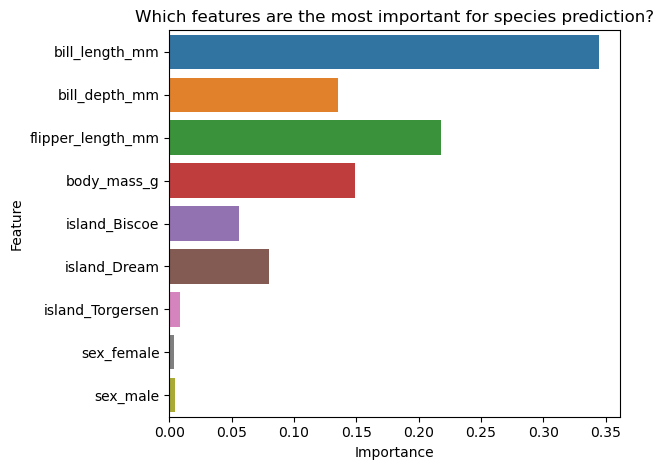

In [16]:
# Creating Feature Importance Plot
fig, ax = plt.subplots() 

ax = sns.barplot(x = rfc.feature_importances_, y = features.columns) 
plt.title('Which features are the most important for species prediction?') 
plt.xlabel('Importance') 
plt.ylabel('Feature') 
plt.tight_layout() 
fig.savefig('feature_importance.png') 